<a href="https://colab.research.google.com/github/ColinCMach/LearningPytorch/blob/main/ResearchPapers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### THe milestone project" Pytroch replicating papers

In [ ]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U --pre torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/nightly/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

torch version: 1.13.1+cu116
torchvision version: 0.14.1+cu116


In [ ]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

[INFO] Couldn't find torchinfo... installing it.
[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 3426, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 3426 (delta 52), reused 100 (delta 44), pack-reused 3302
Receiving objects: 100% (3426/3426), 643.49 MiB | 41.69 MiB/s, done.
Resolving deltas: 100% (1959/1959), done.
Updating files: 100% (222/222), done.


In [ ]:
# set up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# download the data from git hub
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] Did not find data/pizza_steak_sushi directory, creating one...
[INFO] Downloading pizza_steak_sushi.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip...
[INFO] Unzipping pizza_steak_sushi.zip data...


PosixPath('data/pizza_steak_sushi')

In [ ]:
train_dir = image_path / "train"
test_dir = image_path / "test"


In [ ]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [ ]:
# Create dataset and dataloader
from torchvision import transforms
from going_modular.going_modular import data_setup

# create image size

IMG_SIZE = 224

manual_transforms = transforms.Compose([transforms.Resize((IMG_SIZE, IMG_SIZE)),
                                        transforms.ToTensor()
                                        ])
print(f"Manually created transforms: {manual_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
)


In [ ]:
# create a batch size of 32
BATCH_SIZE = 32

# create dataloaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir= train_dir, test_dir = test_dir, transform = manual_transforms, batch_size = BATCH_SIZE)

len(train_dataloader), len(test_dataloader), class_names

(8, 3, ['pizza', 'steak', 'sushi'])

In [ ]:
# get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

image, label = image_batch[0], label_batch[0]

image.shape, label

(torch.Size([3, 224, 224]), tensor(0))

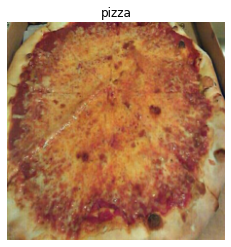

In [ ]:
# plot with matplot lib
import matplotlib.pyplot as plt

plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False);

In [ ]:
image.shape

torch.Size([3, 224, 224])

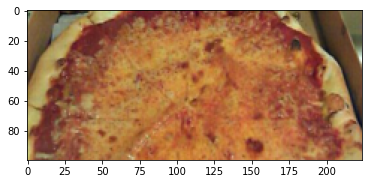

In [ ]:
image_permuted = image.permute(1,2,0) # covert the image to color channels last

# index the top row of the pixels
patch_size = 100

# plt.figure(figsize = (patch_size, patch_size))
plt.imshow(image_permuted[:patch_size,:,:])

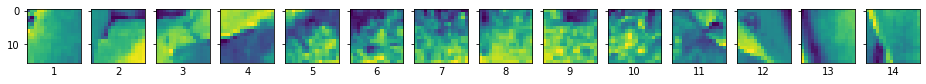

In [ ]:
# set up code to plot the top row as patches
img_size = 224
patch_size = 16
num_patches = img_size/patch_size
assert img_size % patch_size == 0 , " Image size must be divisble by the patch size idiot!"

# Create a series of subplots
fig , axs = plt.subplots(nrows = 1, 
                        ncols = img_size // patch_size,
                        sharex = True,
                        sharey = True,
                        figsize = (patch_size, patch_size)
                        )

# iterate through the number of patches

for i , patch in enumerate(range(0,img_size, patch_size)):
  axs[i].imshow(image_permuted[:patch_size, patch:patch+patch_size, 0 ])
  axs[i].set_xlabel(i+1)
  axs[i].set_xticks([])

In [ ]:
5//2


2

 Number of patches per row: 14.0
 Number of patches per column 14.0
 Total patches 196.0  Patch size : 16


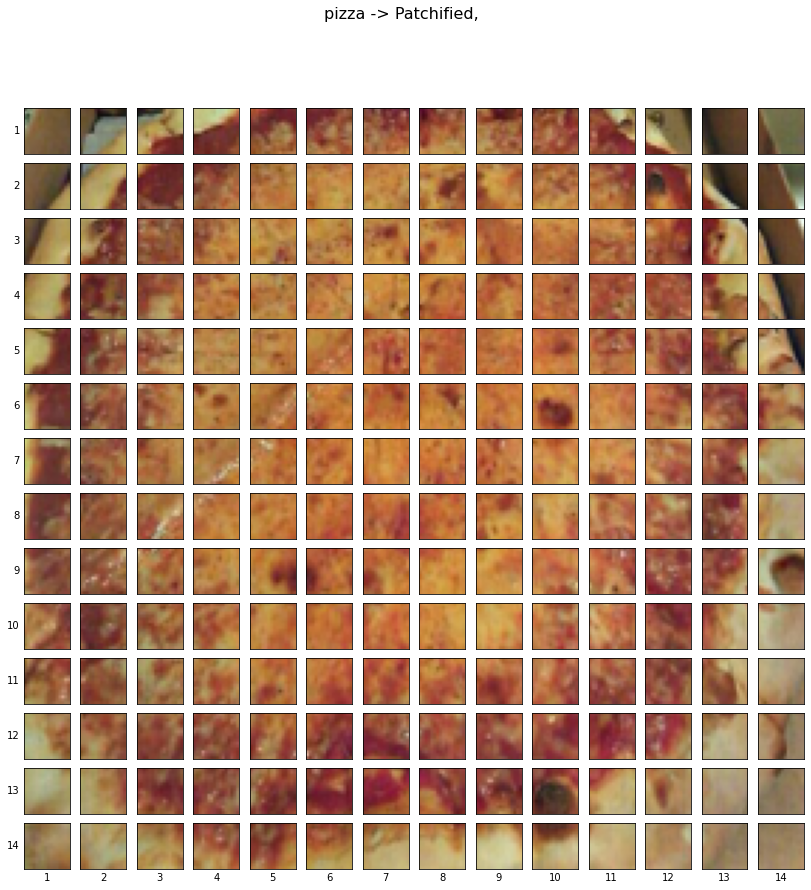

In [ ]:
img_size = 224
patch_size = 16
num_patches = img_size/patch_size
assert img_size % patch_size == 0, " Image size must be divisible by the patch size, BITCH!"
print(f" Number of patches per row: {num_patches}\
\n Number of patches per column {num_patches}\
\n Total patches {num_patches * num_patches}\
  Patch size : {patch_size}")

# create a series of subplots
fig, axs = plt.subplots(nrows = img_size //patch_size,
                        ncols = img_size // patch_size,
                        figsize = (num_patches , num_patches),
                        sharex = True,
                        sharey = True)
# loops throug height ans width of image
for i, patch_height in enumerate(range(0,img_size, patch_size)):
  for j, patch_width in enumerate(range(0, img_size, 16)):

    # plot the permuted image on the different axis
    axs[i,j].imshow(image_permuted[patch_height:patch_height+patch_size, # iterate through the height
                                   patch_width:patch_width+patch_size, # iterate through the width
                                   :])
    axs[i,j].set_ylabel(i+1, rotation ="horizontal",
                        horizontalalignment = "right",
                        verticalalignment = "center"
                        )
    axs[i,j].set_xlabel(j+1)
    axs[i, j].set_xticks([])
    axs[i, j].set_yticks([])
    axs[i, j].label_outer()



fig.suptitle(f"{class_names[label]} -> Patchified,", fontsize = 16)
plt.show()

### Next we need ti create image patches and turn them into embeddings.
perhaps we could create the image patches and image patch into a single step using torch.nn.Conv2d() and setting the kernel size to the stride parameters

In [ ]:
#create a conv 2d layer to turn the image into patches of learnable feature maps
from torch import nn
#
# set the patch size
patch_size = 16

# create a conv 2d layer with hyper parameters from the VIT paper

conv2d = nn.Conv2d(in_channels = 3, 
                   out_channels = 768, # D size from table 1 for the. VIT-Base
                   kernel_size = patch_size,
                   stride = patch_size,
                   padding = 0
                   )
conv2d
# This will create sort of patches that we made from a convolution block 

Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))

(-0.5, 223.5, 223.5, -0.5)

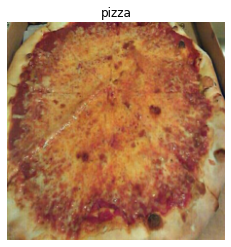

In [ ]:
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False)

In [ ]:
# Pass the image through the convolutional layer 
print(image.shape)
image_out_of_conv = conv2d(image.unsqueeze(0))
image_out_of_conv.shape
print(f"THe shape after the conv layer was applied is{image_out_of_conv.shape} - > [batch_size, embedding_dim, feature_map_height, feature_map _width]")

torch.Size([3, 224, 224])
THe shape after the conv layer was applied istorch.Size([1, 768, 14, 14]) - > [batch_size, embedding_dim, feature_map_height, feature_map _width]


Showing random convolutional feature maps from indexes: [457, 474, 559, 536, 284]


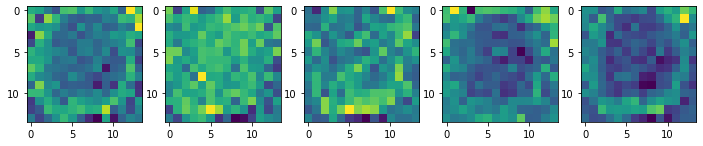

In [ ]:
# plot random convolutional feature maps(embeddings)
import random
random_indexes = random.sample(range(0, 758), k = 5)

print(f"Showing random convolutional feature maps from indexes: {random_indexes}")

# create a plot
fig,axs = plt.subplots(nrows = 1, ncols = 5, figsize = (12,12))

# plot the random images
for i, idx in enumerate(random_indexes):
  image_conv_feature_map = image_out_of_conv[:,idx,:,:] # index of the input tensor of the conv2d layer
  axs[i].imshow(image_conv_feature_map.squeeze().detach().numpy())

In [ ]:
# Get a single feature map in tensor form
single_feature_map = image_out_of_conv[0,0,:,:]
single_feature_map, single_feature_map.requires_grad

(tensor([[-0.0649, -0.1388,  0.0120,  0.1251, -0.0698,  0.0451, -0.0345,  0.0620,
          -0.0483,  0.0230,  0.0971, -0.0735,  0.0328,  0.0390],
         [-0.0680, -0.0353, -0.0552,  0.0536,  0.0463,  0.0050,  0.0343,  0.0501,
           0.1174,  0.0300, -0.0536, -0.0343, -0.0146,  0.0284],
         [ 0.1437, -0.0695, -0.0381,  0.0506,  0.0202,  0.0312, -0.0053,  0.0393,
           0.0187,  0.0376,  0.0063, -0.0278,  0.0638, -0.0141],
         [-0.0582,  0.0543, -0.0062,  0.0355, -0.0509,  0.0368,  0.0459,  0.0768,
           0.0013,  0.0075,  0.0528,  0.0162, -0.0045, -0.0402],
         [-0.1730,  0.0691, -0.0148, -0.0203,  0.0130,  0.0207, -0.0085, -0.0390,
           0.0567, -0.0158, -0.0836, -0.0783,  0.0566, -0.2393],
         [-0.1154,  0.1068,  0.0128,  0.0107,  0.0418,  0.0432, -0.0292, -0.0598,
           0.0541,  0.0114, -0.0216,  0.0080, -0.0626, -0.0098],
         [-0.0808,  0.0563,  0.0582, -0.0029, -0.0267,  0.0433,  0.0434,  0.0350,
           0.1112,  0.0256,  0.0757,

### Flattening the patch embeddings with torch.nn.Flatten()
right now we've a series of convolutional feature maps(patch embeddngs) that we want to flatten into a sequence of patch embeddings to satisfy the input criteria of the Vit Transformer Encoder


In [ ]:
print(f"{image_out_of_conv.shape} -> [batch_size, embedding_dim, feature_map_height, featur_map_width")

torch.Size([1, 768, 14, 14]) -> [batch_size, embedding_dim, feature_map_height, featur_map_width


In [ ]:
from torch import nn
flatten_layer = nn.Flatten(start_dim = 2,
                           end_dim = 3)
flatten_layer(image_out_of_conv).shape

torch.Size([1, 768, 196])

Original image shape: torch.Size([3, 224, 224])
Image feature map (patches) shape: torch.Size([1, 768, 14, 14])
Flattened image feature map shape: torch.Size([1, 768, 196])


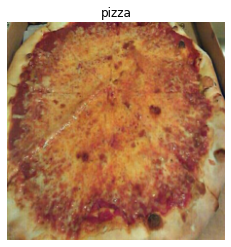

In [ ]:
# Put everything together
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False)
print(f"Original image shape: {image.shape}")

# turn image into feature maps
image_out_of_conv = conv2d(image.unsqueeze(0)) # add batch dimension
print(f"Image feature map (patches) shape: {image_out_of_conv.shape}")

# Flatten the feature maps
image_out_of_conv_flattened = flatten_layer(image_out_of_conv)
print(f"Flattened image feature map shape: {image_out_of_conv_flattened.shape}")

In [ ]:
# Rearrange output of flattened layer
image_out_of_conv_flattened_permuted = image_out_of_conv_flattened.permute(0,2,1)
print(f"{image_out_of_conv_flattened_permuted.shape} -> (batch_size, number_of_patches, embedding_dimensions)")


torch.Size([1, 196, 768]) -> (batch_size, number_of_patches, embedding_dimensions)


(-0.5, 195.5, 0.5, -0.5)

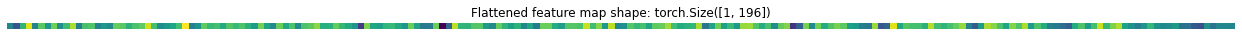

In [ ]:
# Get a single flattened feature map
single_flattened_feature_map = image_out_of_conv_flattened_permuted[:,:,0]

# plot the flattened feature map visially 
plt.figure(figsize = (22,22))
plt.imshow(single_flattened_feature_map.detach().numpy())
plt.title(f"Flattened feature map shape: {single_flattened_feature_map.shape}")
plt.axis(False)

### Next we are going to have to ruen the Vit Patch embedding layer into a pytorch module

We want this model to do a few things:
1. Create a class called patchEmbedding  that inherits from nn.Module 
2. Initialize with apporpiate hyperparameters such as channels , embedding dimensions, and patch size
3. Create a layer to turn an image into embedded patches using nn.Conv2d()
4. Create a layer to flatten the feature maps of the output of the layer in 3.
5. Define a forward() that defines the forward computational ( or pass through layer 3 and 4)
6. make sure the output shape of the layer reflects the required output shape of the patch embedding

In [ ]:
#Create a class called Patch Embedding
class PatchEmbedding(nn.Module):
  #2. initialize the layer with appropiate hyperparameters
  def __init__(self, in_channels:int = 3, patch_size:int = 16, embedding_dim : int = 768):
    super().__init__()
    self.patch_size = patch_size

    #3. Create a layer to turn an image into embeded patches
    self.patcher = nn.Conv2d(in_channels = in_channels, 
                             out_channels = embedding_dim, 
                             kernel_size = patch_size,
                             stride = patch_size ,
                             padding = 0)
    # Create a layer to flatten feature map outputs od Conv2d
    self.flatten = nn.Flatten(start_dim =2 , end_dim = 3)
    
  #5. Define a forward pass
  def forward(self, x):
    # Create an assertion to check inputs are the correct shape
    image_resolution = x.shape[-1]
    assert image_resolution % patch_size == 0, f"Input image size must be disible bt patch size, image shape:{image_resolution}, patch_size :{self.patch_size}"

    #Perform the forward pass
    x_patched = self.patcher(x)

    x_flattened = self.flatten(x_patched)

    # 6. make the returned sequence embedding dimensions  in the right order ( batch_size , number_of_patches, embedding_dimensions)
    return x_flattened.permute(0,2,1)


In [ ]:
set_seeds()

#Create an instance of patch embedding layer

patchify = PatchEmbedding(in_channels = 3, patch_size = 16, embedding_dim = 768)

# pass a single image through the patch embedding layer

print(f"Input image size: {image.unsqueeze(0).shape}")
patch_embedded_image = patchify(image.unsqueeze(0))# add an extra layer for the batch size
print(f"Output patch embedding squenve shape {patch_embedded_image.shape}")


Input image size: torch.Size([1, 3, 224, 224])
Output patch embedding squenve shape torch.Size([1, 196, 768])


In [ ]:
rand_image_tensor = torch.randn(1,3,224,224)
rand_image_tensor_bad = torch.randn(1,3,250,250)

#patchify(rand_image_tensor_bad)

In [ ]:
batch_size = patch_embedded_image.shape[0]
embedding_dimension = patch_embedded_image.shape[-1]

batch_size, embedding_dimension


(1, 768)

In [ ]:
# Create a class token embedding as a learnable parameter that shares the same size embdedding

class_token = nn.Parameter(torch.ones(batch_size, 1, embedding_dimension), requires_grad = True)

class_token.shape

torch.Size([1, 1, 768])

In [ ]:
patch_embedded_image.shape

torch.Size([1, 196, 768])

In [ ]:
# Add the class token embedding to the frount of the patch embedding
patch_embedded_image_with_class_embedding = torch.cat((class_token, patch_embedded_image), dim = 1)# Number of patch dimensions

print(f"Sequence of patch embeddings with class token prepended shape ; {patch_embedded_image_with_class_embedding.shape} -> [batch_size, class_tokem, number of patches , embedding dim ")

Sequence of patch embeddings with class token prepended shape ; torch.Size([1, 197, 768]) -> [batch_size, class_tokem, number of patches , embedding dim 


### Next we want to create a position of embedding 
want to : create a series of 1D learnable position embeddings and to add them to the sequenxe of patch embeddings

In [ ]:
# Create example values
height = 224
width = 224
color_channels = 3
patch_size = 16 

# Calculate the number of patches
number_of_patches = int((height * width) / patch_size**2)
number_of_patches

196

In [ ]:
# Calculate n (number of patches)
number_of_patches = int((height * width / patch_size **2))

# Get the embedding dimension
embedding_dimension = patch_embedded_image_with_class_embedding.shape[-1]
print(embedding_dimension, number_of_patches)
print(patch_embedded_image_with_class_embedding)
# Create the learnable 1d position embedding
position_embedding = nn.Parameter(torch.ones(1, number_of_patches + 1,
                                             embedding_dimension),
                                  requires_grad = True)
position_embedding, position_embedding.shape

768 196
tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [-0.3902,  0.0184, -0.0995,  ...,  0.2769, -0.2167,  0.2311],
         [-0.5393, -0.0262, -0.1467,  ...,  0.2823, -0.1606,  0.1711],
         ...,
         [-0.5424,  0.1774, -0.1478,  ...,  0.4131, -0.3413,  0.2545],
         [-0.5112,  0.0919, -0.1420,  ...,  0.3481, -0.2482,  0.2371],
         [-0.5819,  0.1205, -0.1569,  ...,  0.3898, -0.2699,  0.1897]]],
       grad_fn=<CatBackward0>)


(Parameter containing:
 tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]], requires_grad=True),
 torch.Size([1, 197, 768]))

In [ ]:
# VIew the sequence on patch embeddings with the prepended class embeddings
patch_embedded_image_with_class_embedding, patch_embedded_image_with_class_embedding.shape

(tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [-0.3902,  0.0184, -0.0995,  ...,  0.2769, -0.2167,  0.2311],
          [-0.5393, -0.0262, -0.1467,  ...,  0.2823, -0.1606,  0.1711],
          ...,
          [-0.5424,  0.1774, -0.1478,  ...,  0.4131, -0.3413,  0.2545],
          [-0.5112,  0.0919, -0.1420,  ...,  0.3481, -0.2482,  0.2371],
          [-0.5819,  0.1205, -0.1569,  ...,  0.3898, -0.2699,  0.1897]]],
        grad_fn=<CatBackward0>), torch.Size([1, 197, 768]))

In [ ]:
# Add the position embedding to the patch and class token embedding
patch_and_position_embedding = patch_embedded_image_with_class_embedding + position_embedding
print(patch_and_position_embedding)

print(f"Patch and position embedding shape: {patch_and_position_embedding.shape}")

tensor([[[2.0000, 2.0000, 2.0000,  ..., 2.0000, 2.0000, 2.0000],
         [0.6098, 1.0184, 0.9005,  ..., 1.2769, 0.7833, 1.2311],
         [0.4607, 0.9738, 0.8533,  ..., 1.2823, 0.8394, 1.1711],
         ...,
         [0.4576, 1.1774, 0.8522,  ..., 1.4131, 0.6587, 1.2545],
         [0.4888, 1.0919, 0.8580,  ..., 1.3481, 0.7518, 1.2371],
         [0.4181, 1.1205, 0.8431,  ..., 1.3898, 0.7301, 1.1897]]],
       grad_fn=<AddBackward0>)
Patch and position embedding shape: torch.Size([1, 197, 768])


### PUtting it all together and turn the written code from image to embedding
Image -> flatteneed sequence of patch embeddings

In [ ]:
# set Seeds
set_seeds()

#1. Set the patch size
patch_size = 16

#2. print shapes of original image tensor and get the image dimensions
print(f"Image tensor shape: {image.shape}")
height,width = image.shape[1], image.shape[2]

#3. Get the image tensor and add a batch dimension
x = image.unsqueeze(0)
print(f" Input image shape{x.shape}")

#4. Create a patch embedding layer

patch_embedding_layer = PatchEmbedding(in_channels = 3,
                                       patch_size = patch_size,
                                       embedding_dim = 768)

#5. pass input image through PatchEmbedding 
patch_embedding = patch_embedding_layer(x)
print(f"patch embedding shape: {patch_embedding.shape}")

# 6. create a class token embedding
batch_size = patch_embedding.shape[0]

embedding_dimension = patch_embedding.shape[-1]

class_token = nn.Parameter(torch.ones(batch_size, 1, embedding_dimension), requires_grad = True) # make sure it's learnable so I need to make the gradient trackable

print(f"Class Token embedding shape: {class_token.shape}")

# 7. Prepend the class token embedding to patch embddding 
patch_embedding_class_token = torch.cat((class_token, patch_embedding), dim = 1)
print(f"patch embedding with classt token shape:{patch_embedding_class_token.shape}")

# 8. Create position embedding 
number_of_patches = int((height * width)/ patch_size **2)

positon_embedding = nn.Parameter(torch.ones(1,number_of_patches +1 , embedding_dimension), requires_grad = True)

# 9. Add the position embedding to patch embedding with class token 
patch_and_position_embedding = patch_embedding_class_token + position_embedding
print(f" Patch and position embedding shape: {patch_and_position_embedding.shape}")

Image tensor shape: torch.Size([3, 224, 224])
 Input image shapetorch.Size([1, 3, 224, 224])
patch embedding shape: torch.Size([1, 196, 768])
Class Token embedding shape: torch.Size([1, 1, 768])
patch embedding with classt token shape:torch.Size([1, 197, 768])
 Patch and position embedding shape: torch.Size([1, 197, 768])


In [ ]:
y =torch.ones(1,number_of_patches +1 , embedding_dimension, requires_grad = True)
y.shape

torch.Size([1, 197, 768])

### ENxt we will be replicating the Multi Head self attention
first we need to see which patch to focus most of our attention of 
1. WE will achieve this by seeing which patches relate most to eachother and focusing heavily on those patches.
2.We are going toi want our neural network to learn these pttern in the (vit) actitrture
3. We will also be using layer norm which smoothes out the data and normalizes the distribution data. Smoother gradients, faster training and better generalization accuracy.
- NOirmalization means everything has the same standard deviation and the same mean/
- Normalizes along the embedding dimension making all the stairs in the staricase the same height.

In [ ]:
class MultiHeadSelfAttentionBlock(nn.Module):
  def __init__(self, embedding_dim:int = 768,
               num_heads:int = 12,
               attn_dropout: int = 0):
    super().__init__()

    # Create the norm layer (ln)
    self.layer_norm = nn.LayerNorm(normalized_shape = embedding_dim)

    # Create multihead attention(MSA) layer
    self.multihead_attn = nn.MultiheadAttention(embed_dim = embedding_dim,
                                                num_heads = num_heads,
                                                dropout = attn_dropout,
                                                batch_first = True)
  def forward(self,x):
      x = self.layer_norm(x)
      attn_output, _ = self.multihead_attn(query = x, key = x, value = x, need_weights = False)
      
      return attn_output

In [ ]:
# Create and instance of MSA Block
multihead_self_attention_block = MultiHeadSelfAttentionBlock(embedding_dim = 768, num_heads = 12, attn_dropout = 0)

#passt he patch and position image embedding squence through the MSA block

patched_image_through_msa_block = multihead_self_attention_block(patch_and_position_embedding)

print(f"Input shape of MSA Block :{patch_and_position_embedding.shape}")
print(f"outPut shape of MSA Block{patched_image_through_msa_block.shape}")

Input shape of MSA Block :torch.Size([1, 197, 768])
outPut shape of MSA Blocktorch.Size([1, 197, 768])


### Equation 3:Multilayer Perception (MLP Block)
MLP = a quite broad term with a series of layers which can be formed or even one hidden layer

-Layers can mean: fully-connected, dense layer. They;re often are all names for the same thing. In pytorch they are often called torch.nn.Linear() 
- GELU in pytorch
- MLP number of hidden units = MLP Size in Table 1

Dropout = dropout when used is applied after every layer excerpt for the projections and directly after adding positional- patch embedding. Hybrid mode and trained with the same setup with Vit Counterparts

Inpsudocode
 x = Linear -> non-linear -> dropout -> linear ->dropout

In [ ]:
class MLPBlock(nn.Module):
  def __init__(self, embedding_dim:int = 768,
               mlp_size :int = 3072,
               dropout:int = 0.1):
    super().__init__()

    # Create the norm layer
    self.layer_norm = nn.LayerNorm(normalized_shape = embedding_dim)

    # Create the mlp layer 
    self.mlp = nn.Sequential(nn.Linear(in_features = embedding_dim, out_features = mlp_size),
                             nn. GELU(), 
                             nn.Dropout(p = dropout),
                             nn.Linear(in_features = mlp_size , out_features = embedding_dim)
                             , nn.Dropout(p = dropout))
  def forward(self,x):
    x = self.layer_norm(x)
    x = self.mlp(x)
    return x

In [ ]:
# Create an instance of an mlpBlock
mlp_block = MLPBlock(embedding_dim = 768,
                     mlp_size = 3072,
                     dropout = 0.1
                     )
# Pass the output of the MSA BLOCK Through the mp block

patched_image_through_mlp_block = mlp_block(patched_image_through_msa_block)
print(f"The input shape of the mlp bbloc : {patched_image_through_msa_block.shape}")
print(f"The output shape of the MLP Block is : {patched_image_through_mlp_block.shape}")

The input shape of the mlp bbloc : torch.Size([1, 197, 768])
The output shape of the MLP Block is : torch.Size([1, 197, 768])


#### next We nee to create the transformer encoder

The transformer Encoder is a combination of alternation blocks of MSA ( equation 2) and MLP(equation 3) 
And there are residual connestion between each block

- Encoder = turn a sequence into learnable representaion 
- decoder = go learn representation bacl to some sort of sequence 
- Residal connections = add layer s input to its subsequent output, this enables the creation of deeper neural networks (prevents weights from getting to small)

in psudo code

x_input ->MSA_block -> [MSA_block_output + x_input(residual)] -> MLP block -> [MLP_block_output+ MSA_block_output + x_input] 

In [ ]:
# Create the transformer encoder block
class TransformerEncoderBlock(nn.Module):
  def __init__(self, embedding_dim:int = 768,
               num_heads : int = 12,
               mlp_size:int = 3072,
               mlp_dropout: int = 0.1,
               attn_dropout: int = 0):
    super().__init__()

    # Create the MSA block (equation 2)
    self.msa_block = MultiHeadSelfAttentionBlock(embedding_dim = embedding_dim,
                                                num_heads = num_heads, 
                                                attn_dropout = attn_dropout)
    # Create MLP block (equation 3)
    self.mlp_block = MLPBlock(embedding_dim = embedding_dim ,
                              mlp_size = mlp_size ,
                              dropout = mlp_dropout)
    
  def forward(self, x):
      x = self.msa_block(x)

      x = self.mlp_block(x)
      return x

In [ ]:
# Create an instance of TransformerEncoderblock()
transformer_encoder_block = TransformerEncoderBlock()

# Get  a summary using torch.info.summary
summary(model = transformer_encoder_block,
        input_size = (1,197,768), #-< (batch_size, number_of_patches, embedding_dimension))
        col_names = ["input_size", "output_size", "num_params", "trainable"], 
        col_width = 20,
      row_settings =["var_names"])

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
TransformerEncoderBlock (TransformerEncoderBlock)  [1, 197, 768]        [1, 197, 768]        --                   True
├─MultiHeadSelfAttentionBlock (msa_block)          [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─MultiheadAttention (multihead_attn)         --                   [1, 197, 768]        2,362,368            True
├─MLPBlock (mlp_block)                             [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─Sequential (mlp)                            [1, 197, 768]        [1, 197, 768]        --                   True
│    │    └─Linear (0)                     

In [ ]:
torch_transformer_encoder_layer = nn.TransformerEncoderLayer(d_model = 768, 
                                                             nhead = 12,
                                                             dim_feedforward = 3072,
                                                             dropout = 0.1,
                                                             activation = "gelu",
                                                             batch_first = True,
                                                             norm_first = True)
torch_transformer_encoder_layer

TransformerEncoderLayer(
  (self_attn): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
  )
  (linear1): Linear(in_features=768, out_features=3072, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=3072, out_features=768, bias=True)
  (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
)

In [ ]:
# Create Vit class
class ViT(nn.Module):
  def __init__(self, 
               img_size: int = 224,
               in_channels: int = 3,
               patch_size: int = 16,
               num_transformer_layers: int = 12, # Table ` for "layers" for ViT base)
               embedding_dim:int = 768,
               mlp_size :int = 3072,
               num_heads:int = 12,
               attn_dropout:int = 0,
               mlp_dropout:int = 0.1,
               embedding_dropout:int = 0.1,
               num_classes:int = 1000
               ):
    super().__init__()

    # Make assertion that the image size is compatible with the patch size
    assert img_size % patch_size == 0, f"Image size must be divisble by patch size imgage:{img_size}, patch size : {patch_size}"

    # Calculate the number of patches  (height * width / Patch ^2)
    self.num_patches = (img_size * img_size) // patch_size ** 2

    # Create learnable class embedding (needs to go at front of the sequence of patch embeddings)
    self.class_embedding = nn.Parameter(data = torch.randn(1,1,embedding_dim), requires_grad = True)

    # Create learnable position embeddings 
    self.position_embedding = nn.Parameter(data = torch.randn(1, self.num_patches+1, embedding_dim))

    # Create the embedding dropout value 
    self.embedding_dropout = nn.Dropout(p = embedding_dropout)

    # create patch embedding layer
    self.patch_embedding = PatchEmbedding(in_channels = in_channels, patch_size = patch_size, embedding_dim = embedding_dim)

    # Create the Transformer encoder block
    self.transformer_encoder = nn.Sequential(*[TransformerEncoderBlock(embedding_dim = embedding_dim, num_heads = num_heads, 
                                                                       mlp_size = mlp_size, mlp_dropout = mlp_dropout) for _ in range(num_transformer_layers)])

    # Create a classifier head
    self.classifier = nn.Sequential(nn.LayerNorm(normalized_shape = embedding_dim),
                                    nn.Linear(in_features = embedding_dim, 
                                              out_features = num_classes))
  def forward(self, x):
    # Get the batch size
    batch_size = x.shape[0]

    #Create class token embedding and expand it to match the batch size(equation 1)

    class_token = self.class_embedding.expand(batch_size , -1, -1) # -1 means to infer the dimentions

  # Create the patch embedding (equation 1)
    x = self.patch_embedding(x)

    # concat the calss token embedding and patch embedding (equation 1)
    x = torch.cat((class_token, x ), dim = 1)

    # add the position embedding to class token adn patch embedding
    x = self.position_embedding + x

    # Appy the dropout layer
    x = self.embedding_dropout(x)

    # Pass the position and patch embeddiung to transformer encoser ( equation 2 and 3)

    x = self.transformer_encoder(x)

    # Put the 0th index through the classifier ( equation 4)

    x = self.classifier(x[:,0])

    return x 
  

In [ ]:
batch_size = 32
embedding_dim = 768
# So this is how the -1 inference works , basically it allows all the other shape parameter to be saved while the one you changed is the only one that remains changed
class_embedding = nn.Parameter(data = torch.randn(1,1,embedding_dim),
                               requires_grad = True)
class_embedding_expanded = class_embedding.expand(batch_size, -1,-1)

print(class_embedding.shape)
print(class_embedding_expanded.shape)
print(f"Notice how the shape is only changed on the first dimension because we were able to infer the other dimentions through : -1")

torch.Size([1, 1, 768])
torch.Size([32, 1, 768])
Notice how the shape is only changed on the first dimension because we were able to infer the other dimentions through : -1


In [ ]:
random_image_tensor = torch.randn(1,3,224,224)

# Create an instance of ViT with the number of classes we are working with (pizza,steak and sushi)
vit = ViT(num_classes = len(class_names))

# pass the random image tensor to our Vit instance
vit(random_image_tensor)

tensor([[-0.3890, -0.7018,  0.0089]], grad_fn=<AddmmBackward0>)

### Get a vistual sumamry of our model




In [ ]:
from torchinfo import summary 

summary(model = ViT(num_classes = len(class_names)),
        input_size = (1,3,224,224),
        col_names = ["input_size", "output_size", "num_params", "trainable"],
        col_width = 20,
        row_settings = ["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
ViT (ViT)                                                    [1, 3, 224, 224]     [1, 3]               152,064              True
├─PatchEmbedding (patch_embedding)                           [1, 3, 224, 224]     [1, 196, 768]        --                   True
│    └─Conv2d (patcher)                                      [1, 3, 224, 224]     [1, 768, 14, 14]     590,592              True
│    └─Flatten (flatten)                                     [1, 768, 14, 14]     [1, 768, 196]        --                   --
├─Dropout (embedding_dropout)                                [1, 197, 768]        [1, 197, 768]        --                   --
├─Sequential (transformer_encoder)                           [1, 197, 768]        [1, 197, 768]        --                   True
│    └─TransformerEncoderBlock (0)                           [1, 197, 768]        [1, 197, 768] 

### Setting up training code for our custom ViT
we've replicated the ViT architecture , not let's see how it performs on our food Vision Mini Data.

### Creating an optimizer
the paper from google states it uses the Adam optimizer( section 4, Training and fine-tuning) with a B1 value of 0.9 , B2, 0.999 ( defaults) and a weight decay of 0.1

A weight dcay is a regularization technique by adding a small penalty , usually the L2 norm of the weights of the model , to the loss function 

Regularization techique = prevents overfitting

Since it is a multi class classification we will use torch.nn.Crossentroyloss()


In [ ]:
from going_modular.going_modular import engine

optimizer = torch.optim.Adam(vit.parameters(), lr = 0.01, betas = (0.9,0.999), weight_decay = 0.1)

loss_fn = torch.nn.CrossEntropyLoss()

results = engine.train(model = vit, train_dataloader = train_dataloader, test_dataloader = test_dataloader,
                       epochs = 10, optimizer = optimizer, loss_fn = loss_fn, device = device )

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 6.7600 | train_acc: 0.4102 | test_loss: 6.1805 | test_acc: 0.2604
Epoch: 2 | train_loss: 4.2495 | train_acc: 0.2812 | test_loss: 1.5414 | test_acc: 0.5417
Epoch: 3 | train_loss: 1.9742 | train_acc: 0.2773 | test_loss: 3.5422 | test_acc: 0.2604
Epoch: 4 | train_loss: 2.0111 | train_acc: 0.2617 | test_loss: 3.9320 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.5643 | train_acc: 0.4062 | test_loss: 2.1179 | test_acc: 0.5417
Epoch: 6 | train_loss: 2.3026 | train_acc: 0.2734 | test_loss: 2.0794 | test_acc: 0.1979
Epoch: 7 | train_loss: 1.6248 | train_acc: 0.2227 | test_loss: 1.8837 | test_acc: 0.2604
Epoch: 8 | train_loss: 1.9812 | train_acc: 0.2656 | test_loss: 1.0493 | test_acc: 0.5417
Epoch: 9 | train_loss: 1.2163 | train_acc: 0.2852 | test_loss: 2.9629 | test_acc: 0.1979
Epoch: 10 | train_loss: 1.5985 | train_acc: 0.3398 | test_loss: 1.2135 | test_acc: 0.2604


### Our training step is missing a few things
I have replicated the model archeiture correctly but mine gts very poor results

In my data I am training of 225 images opposed to their millions]

I could have prevented more overfitting by doing the following:
- learning rate warmup - start with a low learning rate and increase to a base LR
- learning rate decay, as my model gets closer to convergence , starts to lower the learning rate
-gradient clipping  - prevents gradients from getting too big
There are many other techniques that promote better techinques

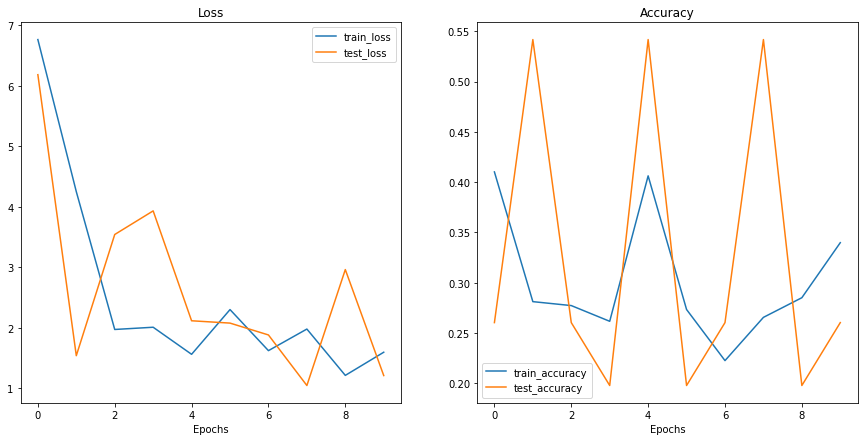

In [ ]:
## plot loss curves for model
from helper_functions import plot_loss_curves

plot_loss_curves(results)

### From the look of the graphs my model is performing terribly , overfitting and underfitting

Now let me try to get a pretrained model, this should allow me to achieve great results



In [ ]:
import torch
import torchvision
print(torch.__version__)
print(torchvision.__version__)

1.13.1+cu116
0.14.1+cu116


In [ ]:
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Prepare the VIT to use with our data (turn it into a feature extractor


In [ ]:
# Get pretrained weigths for VIT - Base
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT # Default usually means it is the best available

# Setup a ViT model instance with pretrained weights 
pretrained_vit = torchvision.models.vit_b_16(weights = pretrained_vit_weights).to(device)

# Freeze the base parameters
for parameter in pretrained_vit.parameters():
  parameter.requires_grad = False
  
# Update the classifier head

pretrained_vit.heads = nn.Linear(in_features = 768, out_features = len(class_names)).to(device)


Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth


  0%|          | 0.00/330M [00:00<?, ?B/s]

In [ ]:
from torchinfo import summary
summary(model=pretrained_vit,
        input_size=(1, 3, 224, 224), # (batch_size, color_channels, height, width)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [1, 3, 224, 224]     [1, 3]               768                  Partial
├─Conv2d (conv_proj)                                         [1, 3, 224, 224]     [1, 768, 14, 14]     (590,592)            False
├─Encoder (encoder)                                          [1, 197, 768]        [1, 197, 768]        151,296              False
│    └─Dropout (dropout)                                     [1, 197, 768]        [1, 197, 768]        --                   --
│    └─Sequential (layers)                                   [1, 197, 768]        [1, 197, 768]        --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [1, 197, 768]        [1, 197, 768]        (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [1, 197, 768]        [1, 1

In [ ]:
vit_transforms = pretrained_vit_weights.transforms()
vit_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
from going_modular.going_modular import data_setup
train_dataloader_pretrained, test_dataloader_pretrained, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                                     test_dir=test_dir,
                                                                                                     transform=vit_transforms,
                                                                                                     batch_size=32) 

### Train Feature extractor ViT model

In [ ]:
from going_modular.going_modular import engine

# Create optimizer and loss function

optimizer = torch.optim.Adam(params = pretrained_vit.parameters(), lr = 0.001)

loss_fn = torch.nn.CrossEntropyLoss()

# Train the classifier head of pretrained ViT

pretrained_vit_results = engine.train(model = pretrained_vit, train_dataloader = train_dataloader,
                                      test_dataloader = test_dataloader, 
                                      optimizer = optimizer,
                                      loss_fn = loss_fn,
                                      epochs = 10,
                                      device = device)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9260 | train_acc: 0.5391 | test_loss: 0.6469 | test_acc: 0.8769
Epoch: 2 | train_loss: 0.5393 | train_acc: 0.9180 | test_loss: 0.4464 | test_acc: 0.8873
Epoch: 3 | train_loss: 0.3442 | train_acc: 0.9219 | test_loss: 0.3476 | test_acc: 0.8873
Epoch: 4 | train_loss: 0.2891 | train_acc: 0.9375 | test_loss: 0.3201 | test_acc: 0.8977
Epoch: 5 | train_loss: 0.2237 | train_acc: 0.9570 | test_loss: 0.3067 | test_acc: 0.8977
Epoch: 6 | train_loss: 0.1987 | train_acc: 0.9570 | test_loss: 0.2809 | test_acc: 0.8977
Epoch: 7 | train_loss: 0.1907 | train_acc: 0.9570 | test_loss: 0.2603 | test_acc: 0.8977
Epoch: 8 | train_loss: 0.2120 | train_acc: 0.9648 | test_loss: 0.2524 | test_acc: 0.8977
Epoch: 9 | train_loss: 0.1501 | train_acc: 0.9688 | test_loss: 0.2294 | test_acc: 0.8873
Epoch: 10 | train_loss: 0.1546 | train_acc: 0.9570 | test_loss: 0.2403 | test_acc: 0.8977


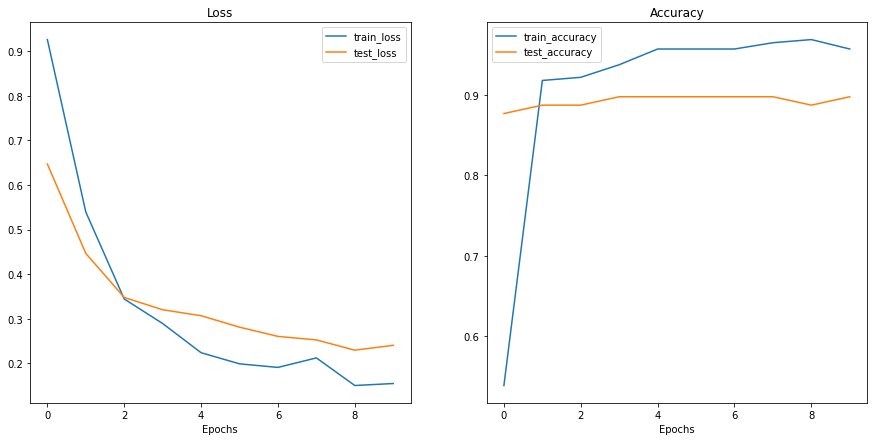

In [ ]:
plot_loss_curves(pretrained_vit_results)

In [ ]:
# savet he model
from going_modular.going_modular import utils

utils.save_model(model = pretrained_vit,
                 target_dir = "models",
                 model_name = "08_pretrained_vit_feature_extractor_pizza_steak_sushi.pth")

[INFO] Saving model to: models/08_pretrained_vit_feature_extractor_pizza_steak_sushi.pth


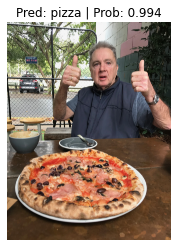

In [ ]:
import requests 

# Import function to make prdictions on images and plot them
from going_modular.going_modular.predictions import pred_and_plot_image

# set up custom image path
custom_image_path = image_path/"04-pizza-dad.jpeg"

# download the image if it does not already exists
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    # when downloading an image from github need to tuse the raw file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)

else:
  print(f"{custom_image_path} already exists , skipping download")


pred_and_plot_image(model = pretrained_vit,
                    image_path = custom_image_path,
                    class_names = class_names)